# CG-sicgle

In [2]:
# ライブラリのインポート
import MDAnalysis
from MDAnalysis.analysis import align
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
# cgモデルの作成（ファイルの読み込み）

cgSep= MDAnalysis.Universe("../../1BRS/1brs_cg_sep.pdb","../../../cafemol_3.2.1/myfolder/separate/bar_brs.dcd")

/home/rintaro/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/home/rintaro/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [6]:
# ATOM　obujectの作成
print (cgSep.atoms)
##output
print(list (cgSep.atoms[:5]))

<AtomGroup [<Atom 1: CA of type C of resname VAL, resid 3 and segid A and altLoc >, <Atom 2: CA of type C of resname ILE, resid 4 and segid A and altLoc >, <Atom 3: CA of type C of resname ASN, resid 5 and segid A and altLoc >, ..., <Atom 193: CA of type C of resname ILE, resid 195 and segid B and altLoc >, <Atom 194: CA of type C of resname LEU, resid 196 and segid B and altLoc >, <Atom 195: CA of type C of resname SER, resid 197 and segid B and altLoc >]>
[<Atom 1: CA of type C of resname VAL, resid 3 and segid A and altLoc >, <Atom 2: CA of type C of resname ILE, resid 4 and segid A and altLoc >, <Atom 3: CA of type C of resname ASN, resid 5 and segid A and altLoc >, <Atom 4: CA of type C of resname THR, resid 6 and segid A and altLoc >, <Atom 5: CA of type C of resname PHE, resid 7 and segid A and altLoc >]


In [7]:
# 残基の抽出
print(cgSep.atoms[100:130].residues)
print(list(cgSep.atoms.residues))

<ResidueGroup [<Residue TYR, 103>, <Residue GLN, 104>, <Residue THR, 105>, ..., <Residue LEU, 130>, <Residue LYS, 131>, <Residue LYS, 132>]>
[<Residue VAL, 3>, <Residue ILE, 4>, <Residue ASN, 5>, <Residue THR, 6>, <Residue PHE, 7>, <Residue ASP, 8>, <Residue GLY, 9>, <Residue VAL, 10>, <Residue ALA, 11>, <Residue ASP, 12>, <Residue TYR, 13>, <Residue LEU, 14>, <Residue GLN, 15>, <Residue THR, 16>, <Residue TYR, 17>, <Residue HIS, 18>, <Residue LYS, 19>, <Residue LEU, 20>, <Residue PRO, 21>, <Residue ASP, 22>, <Residue ASN, 23>, <Residue TYR, 24>, <Residue ILE, 25>, <Residue THR, 26>, <Residue LYS, 27>, <Residue SER, 28>, <Residue GLU, 29>, <Residue ALA, 30>, <Residue GLN, 31>, <Residue ALA, 32>, <Residue LEU, 33>, <Residue GLY, 34>, <Residue TRP, 35>, <Residue VAL, 36>, <Residue ALA, 37>, <Residue SER, 38>, <Residue LYS, 39>, <Residue GLY, 40>, <Residue ASN, 41>, <Residue LEU, 42>, <Residue ALA, 43>, <Residue ASP, 44>, <Residue VAL, 45>, <Residue ALA, 46>, <Residue PRO, 47>, <Residue G

In [8]:
# タンパク質、モノマーの抽出
print(cgSep.atoms.segments)

print(list(cgSep.atoms.segments))

<SegmentGroup [<Segment A>, <Segment B>]>
[<Segment A>, <Segment B>]


In [9]:
# トラジェクトリのフレーム数
print(len(cgSep.trajectory))

1251


## RMSD値の計算

In [10]:
# タンパク質のアラインメント
from MDAnalysis.analysis import align

# トラジェクトリの位置を最初のフレームにリセットする
cgSep.trajectory[0]

# align.AlignTrajでアラインメントを取る
alignment = align.AlignTraj( mobile = cgSep, reference = cgSep, select="protein", in_memory=True)
alignment.run()

In [12]:
# フレーム二点間のRMSDを計算する
from MDAnalysis.analysis import rms

# 最初のフレームにリセット
cgSep.trajectory[0]

# 最初のタンパク質の位置
protein_first = cgSep.select_atoms("protein").positions

# 最後のフレームに移動
cgSep.trajectory[-1]

# 最後のタンパク質の位置
protein_last = cgSep.select_atoms("protein").positions

# rmsdを評価
print(rms.rmsd(protein_first, protein_last))

10.958322373626128


In [14]:
# トラジェクトリ全体のrmsdを計算する

# フレームのリセット
cgSep.trajectory[0]

# RMSD解析
RMSD_analysis = rms.RMSD(cgSep,   # アラインメントを取るオブジェクト  
                     cgSep,     # アラインメントを合わせるリファレンスのオブジェクト  
                     select = "backbone",  # 計算対象を主鎖にする  
                     ref_frame = 0    # リファレンスのフレームインデックス  
                        )
RMSD_analysis.run() 

In [15]:
print("type : ", type(RMSD_analysis.results.rmsd))
print("1st data : ", RMSD_analysis.results.rmsd[0])
print("total data number : ", len(RMSD_analysis.results.rmsd))

# type :  <class 'numpy.ndarray'>
# 1st data :  [0.0000000e+00 0.0000000e+00 6.0600393e-07]
# total data number :  50

type :  <class 'numpy.ndarray'>
1st data :  [0.00000000e+00 0.00000000e+00 3.86329409e-07]
total data number :  1251


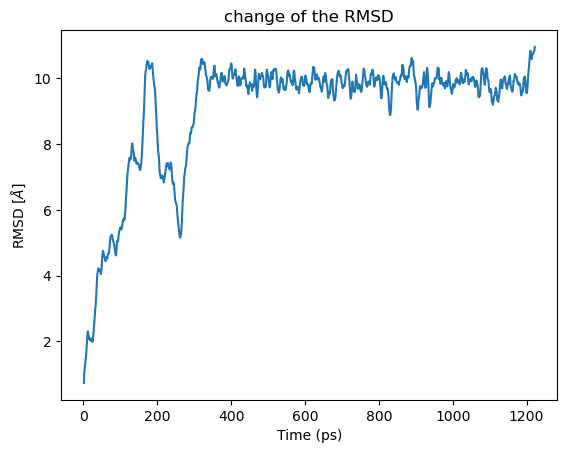

In [16]:
# RMSDのプロット
import matplotlib.pyplot as plt

time_ps = RMSD_analysis.results.rmsd[1:, 1]
backbone_RMSDs = RMSD_analysis.results.rmsd[1:, 2]

plt.plot(time_ps, backbone_RMSDs)

plt.title("change of the RMSD")
plt.xlabel("Time (ps)")
plt.ylabel("RMSD [$\AA$]")
plt.show()


/tmp/ipykernel_16825/4288657058.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(RMSD_analysis.results.rmsd[1:, 2], shade=True)


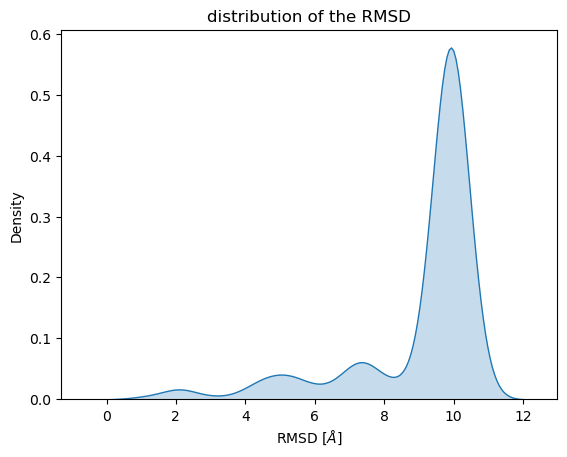

In [17]:
# 確立分布

import seaborn as sb

sb.kdeplot(RMSD_analysis.results.rmsd[1:, 2], shade=True)

plt.title("distribution of the RMSD")
plt.xlabel("RMSD [$\AA$]")
plt.show()

## 参照構造との比較

In [19]:
# 参照構造とのrmsdを計算する

# フレームのリセット
cgSep.trajectory[0]

# 参照構造の読み込み
ref = MDAnalysis.Universe("../../1BRS/1brs_cg.pdb")

# RMSD解析
RMSD_analysis = rms.RMSD(cgSep,   # アラインメントを取るオブジェクト  
                     ref,     # アラインメントを合わせるリファレンスのオブジェクト  
                     select = "backbone",  # 計算対象を主鎖にする  
                     ref_frame = 0    # リファレンスのフレームインデックス  
                        )
RMSD_analysis.run() 

In [20]:
print("type : ", type(RMSD_analysis.results.rmsd))
print("1st data : ", RMSD_analysis.results.rmsd[0])
print("total data number : ", len(RMSD_analysis.results.rmsd))

# type :  <class 'numpy.ndarray'>
# 1st data :  [0.0000000e+00 0.0000000e+00 6.0600393e-07]
# total data number :  50

type :  <class 'numpy.ndarray'>
1st data :  [0.         0.         9.84594095]
total data number :  1251


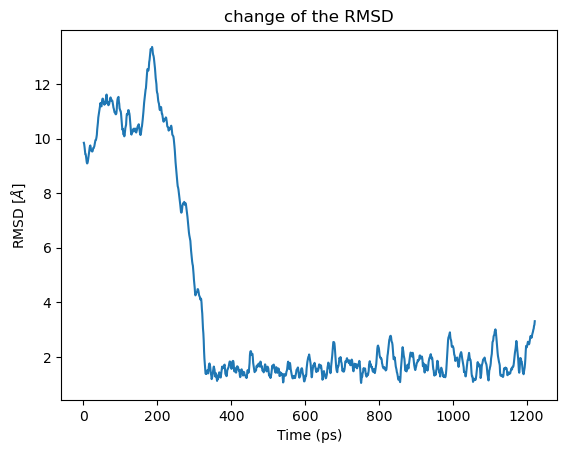

In [21]:
# RMSDのプロット
import matplotlib.pyplot as plt

time_ps = RMSD_analysis.results.rmsd[1:, 1]
backbone_RMSDs = RMSD_analysis.results.rmsd[1:, 2]

plt.plot(time_ps, backbone_RMSDs)

plt.title("change of the RMSD")
plt.xlabel("Time (ps)")
plt.ylabel("RMSD [$\AA$]")
plt.show()

/tmp/ipykernel_16825/4288657058.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(RMSD_analysis.results.rmsd[1:, 2], shade=True)


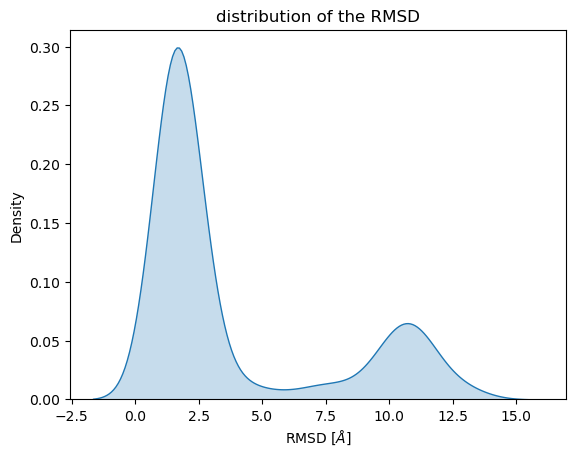

In [22]:
# 確立分布

import seaborn as sb

sb.kdeplot(RMSD_analysis.results.rmsd[1:, 2], shade=True)

plt.title("distribution of the RMSD")
plt.xlabel("RMSD [$\AA$]")
plt.show()